In [1]:
%display latex

# Animationen um den Support von $\psi$ zu sehen

In [2]:
var('x y')

(x, y)

In [3]:
f(x,y) = (unit_step(2-x)*unit_step(x-1/2) + unit_step(+2+x)*unit_step(-x-1/2))*\
        (unit_step(1-abs(y/x))*unit_step(abs(y/x)+1))

supp(x,y) = (unit_step(x-1) + unit_step(-x-1))*\
        (unit_step(1-abs(y/x))*unit_step(abs(y/x)+1))

In [7]:
def plotter(a=1,s=0):
    show(contour_plot(supp,(x,-4,4),(y,-4,4),plot_points=100, fill=False) +\
    contour_plot(f(a*x, sqrt(a)*y - sqrt(a)*s*x), (x,-4,4), (y,-4,4), plot_points=200, fill=False)+\
    implicit_plot(-1+x**2-y**2==0,(x,-4,4),(y,-4,4)))

In [8]:
@interact
def _(scale=slider(0.05,1,step_size=0.05), shear=slider(-2,2,step_size=0.1)):
    plotter(a=scale,s=shear)

# Plots für das konkret gewählte $\psi = e^{-\frac{1}{1-x^2}}$

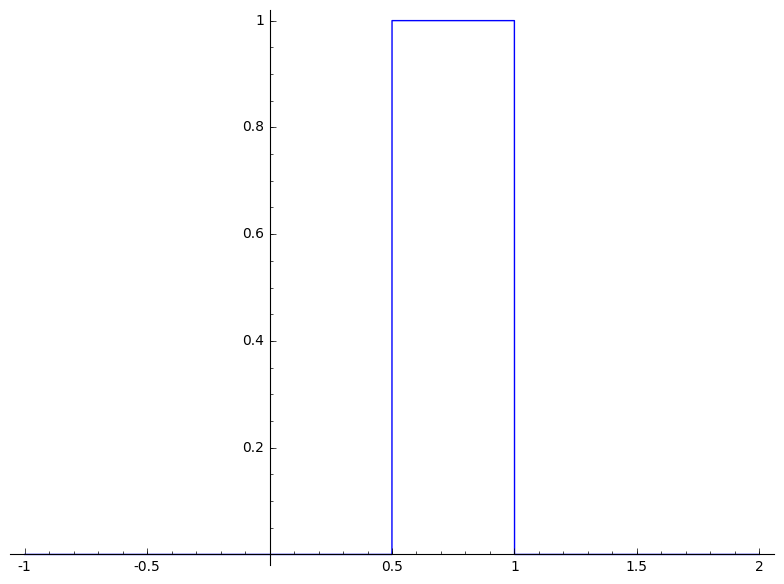

In [6]:
var('a b')
f(x) = heaviside(x-a) - heaviside(x-b)
chi(x,a,b) = heaviside(x-a) -heaviside(x-b)
plot(chi(x,1/2,1), (x,-1,2))

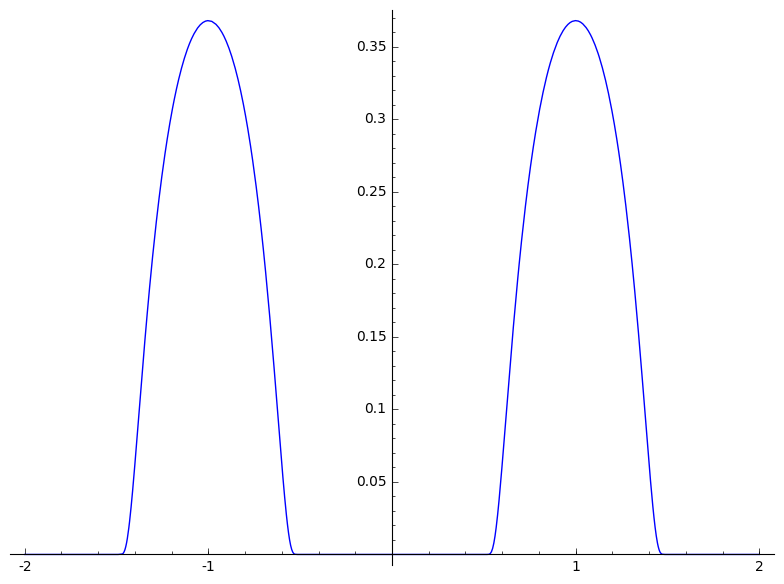

In [7]:
w = var('omega')
b(w) = sin((3*abs(w)-1)*pi/2)*chi(abs(w),1/3,2/3) +  sin((4/3-abs(w))*3*pi/4)*chi(abs(w),2/3,4/3)
psi1(w) = exp(i*pi*w)*b(w)
#plot(exp(-1/(1-(2*w-2)**2))*chi(w,1/2,3/2), (w,-2,2))

psi1(w) = exp(-1/(1-(2*w-2)**2))*chi(w,1/2,3/2) + exp(-1/(1-(2*w+2)**2))*chi(w,-3/2,-1/2)
plot(psi1(w), (w,-2,2))

In [8]:
diff(sqrt(y**2-1)/y,y)

1/sqrt(y^2 - 1) - sqrt(y^2 - 1)/y^2

In [9]:
solve(y**2 == 1/(1-x**2),x)

[x == -sqrt(y^2 - 1)/y, x == sqrt(y^2 - 1)/y]

In [10]:
f(y) = exp(-y**2)*(1/sqrt(y**2-1)-sqrt(y**2-1)/y**2)
integrate(f,y,-oo,oo)

integrate((1/sqrt(y^2 - 1) - sqrt(y^2 - 1)/y^2)*e^(-y^2), y, -Infinity, +Infinity)

# Nebenrechungungen für $\left< \psi_{ast}, G_F\right>$

In [11]:
xi1, xi2, k1, k2, k, m, W, w, a, s, epsilon = var('xi1 xi2 k1 k2 k m Omega omega a s epsilon')

In [12]:
simplify(m**2-W**2*(a**(-2) - a**-1*k**2-2*k*s*a**(-3/2)-s**2*a**(-2)))

Omega^2*(k^2/a + 2*k*s/a^(3/2) + s^2/a^2 - 1/a^2) + m^2

In [20]:
f = 1/(m**2-w**2+k**2-i*epsilon)
pretty_print(f)
integrate(f, k)


1/(k^2 + m^2 - w^2 - I*epsilon)

1/2*log((k - sqrt(-m^2 + w^2 + I*epsilon))/(k + sqrt(-m^2 + w^2 + I*epsilon)))/sqrt(-m^2 + w^2 + I*epsilon)

In [18]:
Gf(m,w,k) = 1/(m**2-w**2+k**2)

c=range(-10,10,2)
contour_plot(Gf(1,x,y), (x,-1,1), (y,-1,1), plot_points=200, fill=False,contours=c)
pretty_print(plot3d(Gf(1,x,y), (x,-0.3,0.3), (y,-0.3,0.3)))
#show(W, figsize=8
#plot(Gf(1,0.9,y), (y,-1,1))

Graphics3d Object

In [16]:
#def supp(x,y,a,s):
#    if ((-2/a < x and x < -1/(2*a)) or (1/(2*a) < x and x < 2/a)) and abs(y/x-s) <= sqrt(a):
#        return True
#    
#    else:
#        return False
    
supp(x,y) = (unit_step(x-1) + unit_step(-x-1))*\
        (unit_step(1-abs(y/x))*unit_step(abs(y/x)+1))

In [43]:
fhat(w,k,t,x,a) = exp(-i*w*(t-x)/a + i*k*x/sqrt(a))/(2*k*w**2)
assume(t, x, a, "real")
fhat

(w, k, t, x, a) |--> 1/2*e^(I*k*x/sqrt(a) - I*(t - x)*w/a)/(k*w^2)

In [44]:
integrate(fhat, (k,-oo,oo))

(w, t, x, a) |--> 1/2*integrate(e^(I*k*x/sqrt(a) - I*(t - x)*w/a)/k, k, -Infinity, +Infinity)/w^2

In [47]:
from sage.symbolic.integration.integral import indefinite_integral
pretty_print(indefinite_integral(indefinite_integral(fhat(w,k,t,x,a), w), k))
indefinite_integral(fhat(w,k,t,x,a), k)

-1/2*I*(t - x)*Ei(I*k*x/sqrt(a))*gamma(-1, I*(t - x)*w/a)/a

1/2*Ei(I*k*x/sqrt(a))*e^(-I*(t - x)*w/a)/w^2

In [51]:
indefinite_integral(exp(-1/(1+x**2))*supp(-1,1),x)

x*e^(-1/(x^2 + 1)) - 2*integrate(x^2*e^(-1/(x^2 + 1))/(x^4 + 2*x^2 + 1), x)

# zur 2-pt Function

In [9]:
E, w, m, k, s, a,p  = var('E omega m k s a p')
assume(E, w, m,k, s, a, p, 'real')

In [3]:
w, m, k, s, a = var('omega m k s a')
pretty_print(0 == w**2 * (1-s**2)/a**2 - 2*w*s*k/a**(3/2) - k**2/a - m**2)
simplify(solve(0 == w**2 * (1-s**2)/a**2 - 2*w*s*k/a**(3/2) - k**2/a - m**2, w))

0 == -m^2 - 2*k*omega*s/a^(3/2) - k^2/a - (s^2 - 1)*omega^2/a^2

[omega == -(a*k*s + sqrt(-a*m^2*s^2 + a*m^2 + k^2)*a)/((s^2 - 1)*sqrt(a)), omega == -(a*k*s - sqrt(-a*m^2*s^2 + a*m^2 + k^2)*a)/((s^2 - 1)*sqrt(a))]

In [4]:
w(k) = (sqrt(a)*s*k + sqrt(m**2*(1-s**2)+k**2))/(s**2-1)

In [5]:
diff(w(k),k)

(sqrt(a)*s + k/sqrt(-(s^2 - 1)*m^2 + k^2))/(s^2 - 1)

In [6]:
pretty_print(2*w*sqrt(p**2+m**2) - 2*k*p == w**2+m**2-k**2)
solve(2*w*sqrt(p*p+m**2) - 2*k*p == w**2+m**2-k**2, p)

k |--> -2*k*p + 2*(sqrt(a)*k*s + sqrt(-(s^2 - 1)*m^2 + k^2))*sqrt(m^2 + p^2)/(s^2 - 1) == -k^2 + m^2 + (sqrt(a)*k*s + sqrt(-(s^2 - 1)*m^2 + k^2))^2/(s^2 - 1)^2

[p == -1/2*(a*k^2*s^2 - (s^4 - 2*s^2)*k^2 + (s^4 - 3*s^2 + 2)*m^2 + 2*sqrt(-m^2*s^2 + k^2 + m^2)*sqrt(a)*k*s - 2*((s^3 - s)*sqrt(a)*k + sqrt(-m^2*s^2 + k^2 + m^2)*(s^2 - 1))*sqrt(m^2 + p^2))/((s^4 - 2*s^2 + 1)*k)]

In [14]:
pretty_print(sqrt(k**2+m**2) == E - sqrt((p-k)**2 + m**2))
solve(sqrt(k**2+m**2) == E - sqrt((p-k)**2 + m**2), k)

sqrt(k^2 + m^2) == E - sqrt((k - p)^2 + m^2)

[sqrt(k^2 + m^2 - 2*k*p + p^2) == E - sqrt(k^2 + m^2)]

In [22]:
pretty_print(k**2*(1-(p/E)**2) + k*(p**2-E**2)*p/E**2 + m**2 - (p**2-E**2)**2/(4*E**2) == 0)
sol = solve(k**2*(1-(p/E)**2) + k*(p**2-E**2)*p/E**2 + m**2 - (p**2-E**2)**2/(4*E**2) == 0, k)
pretty_print(simplify(sol[0]))
pretty_print(simplify(sol[1]))

-k^2*(p^2/E^2 - 1) + m^2 - (E^2 - p^2)*k*p/E^2 - 1/4*(E^2 - p^2)^2/E^2 == 0

k == 1/2*(E^2*p - p^3 - sqrt(E^4 - 4*E^2*m^2 + p^4 - 2*(E^2 - 2*m^2)*p^2)*E)/(E^2 - p^2)

k == 1/2*(E^2*p - p^3 + sqrt(E^4 - 4*E^2*m^2 + p^4 - 2*(E^2 - 2*m^2)*p^2)*E)/(E^2 - p^2)

In [56]:
wprime(k,m) = k/sqrt(k**2+m**2)
l = (wprime**2 + 1)/(2*wprime)
l(k,m).simplify()

1/2*sqrt(k^2 + m^2)*(k^2/(k^2 + m^2) + 1)/k

In [13]:
pretty_print(a**(-3/2)*w**2*(-2*k-a**(1/2)*k**2) == 4* m**2)
solve(a**(-3/2)*w**2*(-2*k-a**(1/2)*k**2) == 4 * m**2,k)

-(sqrt(a)*k^2 + 2*k)*w^2/a^(3/2) == 4*m^2

[k == -(w + sqrt(-4*a^2*m^2 + w^2))/(sqrt(a)*w), k == -(w - sqrt(-4*a^2*m^2 + w^2))/(sqrt(a)*w)]

In [18]:
pretty_print(w**2*a**(1/2)*(k+(w+sqrt(w**2-4*a**2*m**2))/(sqrt(a)*w))*(k+(w-sqrt(w**2-4*a**2*m**2))/(sqrt(a)*w)))
expand(w**2*a**(1/2)*(k+(w+sqrt(w**2-4*a**2*m**2))/(sqrt(a)*w))*(k+(w-sqrt(w**2-4*a**2*m**2))/(sqrt(a)*w)))

sqrt(a)*(k + (w + sqrt(-4*a^2*m^2 + w^2))/(sqrt(a)*w))*(k + (w - sqrt(-4*a^2*m^2 + w^2))/(sqrt(a)*w))*w^2

sqrt(a)*k^2*w^2 + 4*a^(3/2)*m^2 + 2*k*w^2

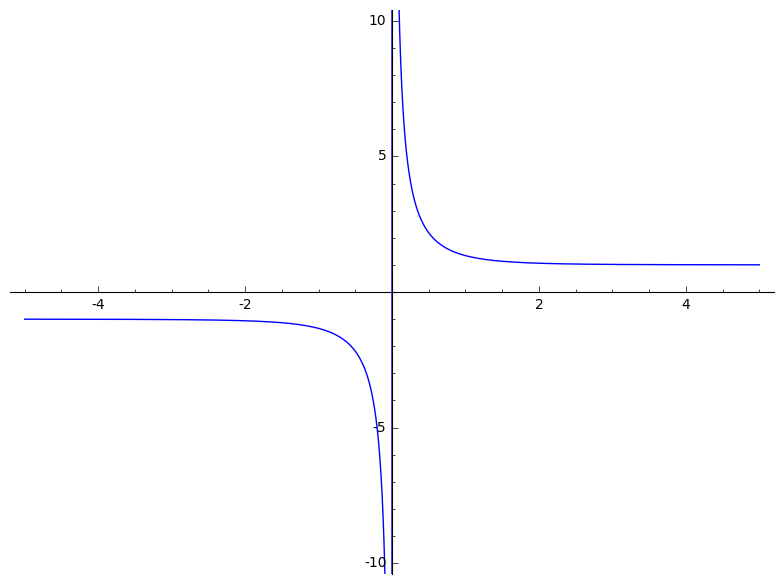

In [37]:
plot(l(k/2,1),(k,-5,5),ymin=-10,ymax=10)

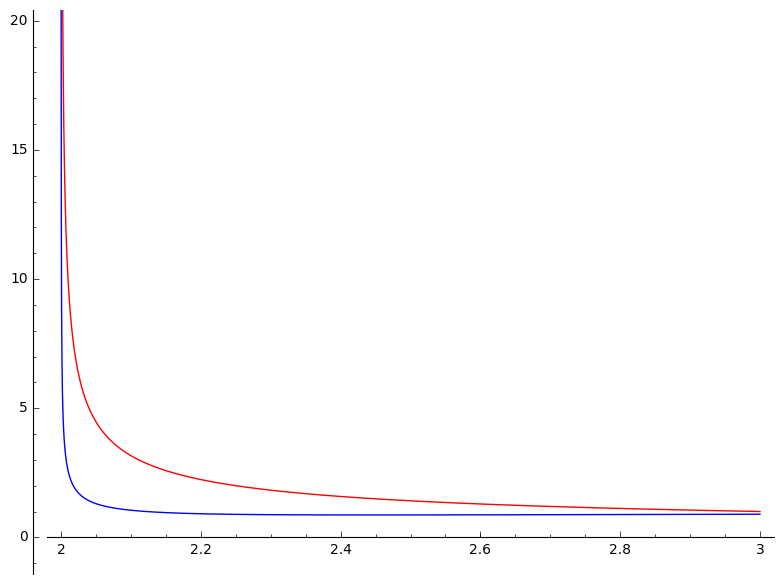

In [30]:
plot(((x**2-3)/(x*sqrt(x**2-4)))*unit_step(x-2), xmin=2, xmax=3,ymin=-1, ymax=20, plot_points=1000) +\
plot(1/sqrt(x-2)*unit_step(x-2), xmin=2, xmax=3,ymin=-1, ymax=20, plot_points=1000, color='red')

# Plots der "relativistischen Wellenfronten"

In [11]:
wave(x,t,k,w) = exp(-i*w*t + i*k*x)

def plotte2(x=1, t=0):
    show(contour_plot(wave(x,t,k,w).real(),(k,-4,4),(w,-4,4),plot_points=100, fill=False))

In [12]:
@interact
def _(time=slider(-2,2,step_size=0.1), space=slider(-2,2,step_size=0.1)):
    plotte2(x=space,t=time)

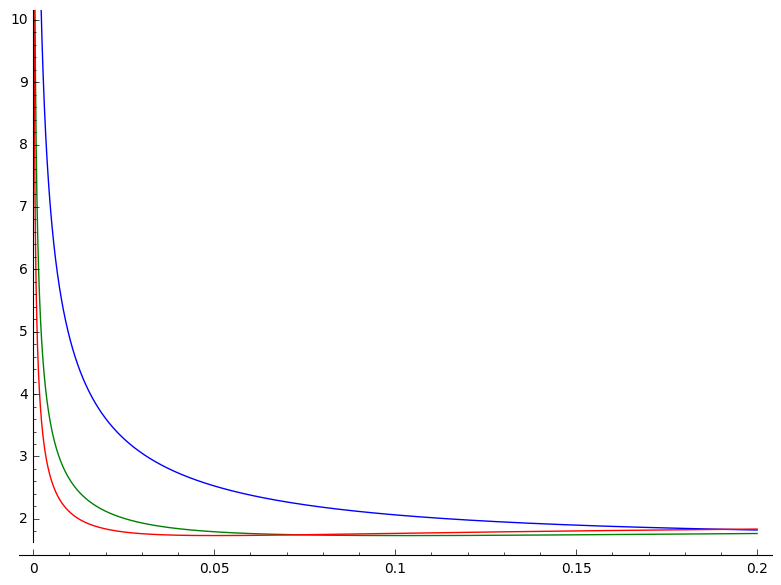

In [73]:
k, w, a, m = var('k omega a m')
fhat(w,k,m) = 2*(w**2-k**2-3*m**2)/(sqrt(w**2-k**2)*sqrt(w**2-k**2-4*m**2))*unit_step(w**2-k**2-4*m**2)
m = 1
plot(fhat(3*m, k-sqrt(5*m**2), m), (k,0,0.2), ymin=1.8, ymax=10) +\
plot(fhat(10*m, k-sqrt(96*m**2), m), (k,0,0.2), color='green') +\
plot(fhat(20*m, k-sqrt(396*m**2), m), (k,0,0.2), color='red')

verbose 0 (3749: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 150 points.
verbose 0 (3749: plot.py, generate_plot_points) Last error message: 'math domain error'


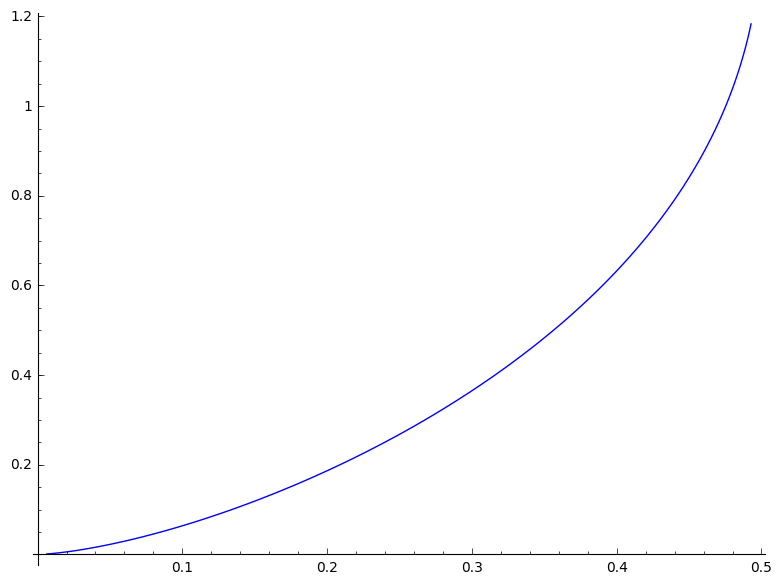

In [76]:
plot((1-sqrt(1-4*x**2))/(sqrt(x)))